# Plotting the current speed during specific weather events over the region and each specific reef.
Data can be manipulated to load on data for the El nino event, or the La nina event

In [1]:
import pandas as pd
import xarray as xr
import numpy as np

import cmocean as cmo
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


#%config InlineBackend.figure_format = 'retina'
plt.ion()  # To trigger the interactive inline mode
%matplotlib inline  
plt.rcParams['figure.figsize'] = (6,5)

In [2]:
plt.rcParams['font.size']=14
plt.rcParams['axes.labelsize'] = 'medium'

In [3]:
%matplotlib inline

# Loading dataset

Daraset contains u and v files for the month of november 2015. u and v are used to represent the speed of oceanic current. 


In [4]:
u_files = 'https://dapds00.nci.org.au/thredds/dodsC/gb6/BRAN/BRAN2020/daily/ocean_u_2015_11.nc'
v_files = 'https://dapds00.nci.org.au/thredds/dodsC/gb6/BRAN/BRAN2020/daily/ocean_v_2015_11.nc'
ds_u = xr.open_dataset(u_files)
ds_v = xr.open_dataset(v_files)

# Domain
x0,x1 = 100,165
y0,y1 = -60, -5

# Subset an xarray.DataArray
my_u = ds_u['u'].sel(xu_ocean=slice(x0,x1), yu_ocean=slice(y0,y1), st_ocean=2.5)
my_v = ds_v['v'].sel(xu_ocean=slice(x0,x1), yu_ocean=slice(y0,y1), st_ocean=2.5)

speed = np.abs(my_u + 1j*my_v)
out_ds = xr.Dataset({'u':my_u,'v':my_v,'speed':speed})
out_ds.to_netcdf('2015_11.nc')

out_ds = xr.open_mfdataset('2015_11.nc')

In [6]:
out_ds

<xarray.Dataset>
Dimensions:   (xu_ocean: 651, yu_ocean: 551, Time: 30)
Coordinates:
  * xu_ocean  (xu_ocean) float64 100.0 100.1 100.2 100.3 ... 164.8 164.9 165.0
  * yu_ocean  (yu_ocean) float64 -60.0 -59.9 -59.8 -59.7 ... -5.3 -5.2 -5.1 -5.0
    st_ocean  float64 ...
  * Time      (Time) datetime64[ns] 2015-11-01T12:00:00 ... 2015-11-30T12:00:00
Data variables:
    u         (Time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(30, 551, 651), meta=np.ndarray>
    v         (Time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(30, 551, 651), meta=np.ndarray>
    speed     (Time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(30, 551, 651), meta=np.ndarray>

In [7]:
def plotbox(ax,xylims, **kwargs):
    x0,x1,y0,y1 = xylims
    return ax.plot([x0, x1, x1, x0, x0],
                    [y0, y0, y1, y1, y0], **kwargs)

## Plotting regional current speed during the specific weather event
In this case, I have plotted the current speed around the entire AUstralian region during a specific El nino event, with the Coral Sea Marine Parks region highlighted.

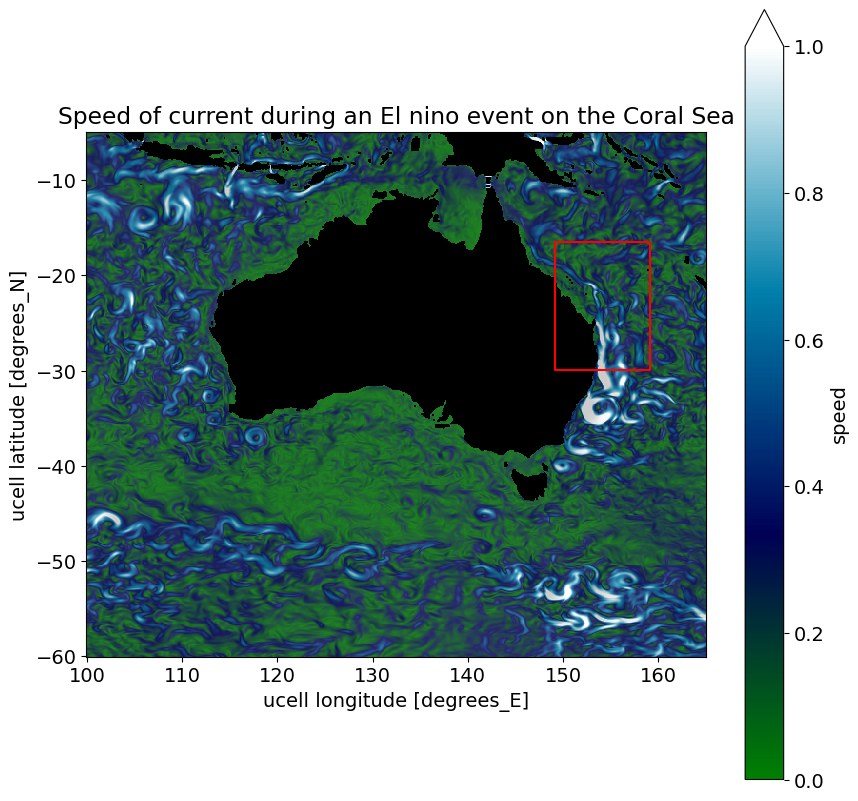

In [11]:
# Plot a time step 

x0,x1 = 149.13, 159.13
y0,y1 = -16.52, -29.92


fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, facecolor='k')
out_ds['speed'][0,...].plot(cmap=cm.ocean, vmin=0, vmax=1.0, ax=ax)
out_ds['v'][0,...].plot(cmap='Greys_r', alpha=0.2, vmin=-1, vmax=1, ax=ax,
                        add_colorbar=False)
plt.title('Speed of current during an El nino event on the Coral Sea')
fig.tight_layout

plotbox(ax, (x0,x1,y0,y1),c='r',ls='-')
ax.set_aspect('equal')
plt.savefig("Elninocurrent2015_coralsea")

## Loading in specific coordinates for each reef to plot the current speed around each reef during the weather event
Coordinates can be changed easily to plot each specific reef sites current speed during the chosen weather event.

In [12]:
reef_lat = -14.05
reef_lon = 121.76

In [13]:
speed = out_ds.speed.sel(xu_ocean=reef_lon, yu_ocean=reef_lat, method='nearest')

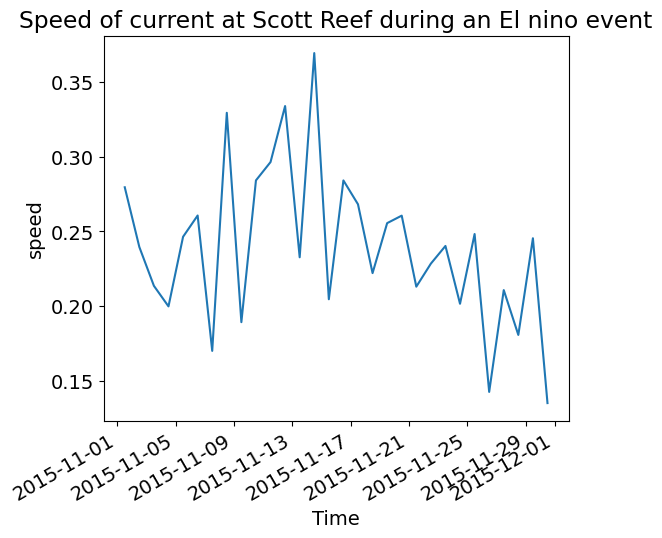

In [14]:
speed.plot()
plt.title('Speed of current at Scott Reef during an El nino event')
fig.tight_layout

plt.savefig("2015_elnino_scottreef_speed")